In [58]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Elliptic Equations

Let  The boundary conditions be:

$$ V(x,0) = 1.0V; 0 < x < L $$

![BCs](BCsLaplace.png)

$$ V(0,y) = 0; V(L, y) = 0; V(x, L) = 0 $$

$$ \frac{\partial ^2 V(x,y)}{\partial x^2} + \frac{\partial ^2 V(x,y)}{\partial y^2}  = 0$$

$$ V(x,y) = X(x) Y(y) $$

$$ Y(y) X''(x) + X(x) Y''(x) = 0 $$

$$ \frac{Y(y) X''(x)}{X(x) Y(y)} +\frac{X(x) Y''(y)}{X(x) Y(y)} = 0 $$

$$ \frac{X''(x)}{X(x)} +\frac{Y''(y)}{Y(y)} = 0 $$


$$ \frac{X''(x)}{X(x)} = -\frac{Y''(y)}{Y(y)} = - \lambda $$

$$ \frac{d^2 X(x)}{d x^2} = -\lambda $$

$$ \frac{d^2 Y(y)}{d y^2} = \lambda $$

$$ X(x) = A \sin(k x) $$

$$ X''(x) = - k^2 A \sin(k x) = -k^2 X(x), \lambda = k^2 $$

$$ Y(y) = C e^{-k^2 y} + D e^{+k^2 y} $$

$$ k_n = \frac{n \pi}{L} $$

$$ V_n(x,y) = A_n \sqrt{\frac{2}{L}}\sin(\frac{n \pi x}{L}) \left( C_n e^{-(\frac{n \pi}{L})^2 y} + D_n e^{+(\frac{n \pi}{L})^2 y}\right)$$

$$ V_n(x,y) =\sum_{n=1}^{\infty} A_n \sqrt{\frac{2}{L}}\sin(\frac{n \pi x}{L}) \left( C_n e^{-(\frac{n \pi}{L})^2 y} + D_n e^{+(\frac{n \pi}{L})^2 y}\right) $$


$$ V(x, y) = \sum_{n=1}^{\infty} A_n \sqrt{\frac{2}{L}}\sin(\frac{n \pi x}{L}) \left( C_n e^{-(\frac{n \pi}{L})^2 y} + D_n e^{+(\frac{n \pi}{L})^2 y}\right) $$

$$ |n\rangle = \sqrt{\frac{2}{L}}\sin(\frac{n \pi x}{L}) $$

$$ |m\rangle = \sqrt{\frac{2}{L}}\sin(\frac{m \pi x}{L}) $$

$$ \langle m | n \rangle = \delta_{nm} $$


When y==0

$$ V(x,0) = \sum_{n=1}^{\infty} A_n \sqrt{\frac{2}{L}}\sin(\frac{n \pi x}{L})( C_n + D_n ) $$

Make $C_n + D_n == 1$ and $\left( C_n e^{-(\frac{n \pi}{L})^2 L} + D_n e^{+(\frac{n \pi}{L})^2 L}\right) = 0$.

$$ V(x, 0) = \sum_{n=1}^{\infty} A_n \sqrt{\frac{2}{L}}\sin(\frac{n \pi x}{L}) = \sum_{n=1}^\infty A_n |n\rangle$$

$$\langle m |V\rangle = \sum_{n=1}^\infty A_n\langle m |n\rangle$$

$$A_m = \langle m |V\rangle $$

In [64]:
def initPotential(N=100):
    V = np.zeros((2,N,N))

    V[0,0] = np.ones(N)
    V[1,0] = np.ones(N)

    dst = 1
    src = 0
    
    return V, dst, src

![sub matrices](SliceSubMatrices.png)

In [78]:
def calcError(V):
    return np.sqrt(((V[1] - V[0])**2).sum()/(N**2))


def doCalculation(V, dst, src, minError = 1e-6):
    error = 1
    count = 0
    while error > minError:
        mat1 = V[src, :-2, 1:-1]  # purple
        mat2 = V[src, 2:, 1:-1]   # yellow
        mat3 = V[src, 1:-1, :-2]  # red
        mat4 = V[src, 1:-1, 2:]   # blue
        V[dst,1:-1,1:-1] = (mat1 + mat2 + mat3 + mat4)/4
        dst = 1 - dst
        src = 1 - src
        error = calcError(V)
        count += 1
        if (count % 1000) == 0:
            print("Counting..", count, "error: ", error)
            
    return count, error, V


In [79]:
def doBoth(N=100):
    V, dst, src = initPotential(100)
    count, error, V = doCalculation(V, dst, src, minError=1e-4)
    
%timeit doBoth()

83.4 ms ± 5.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [83]:
count, error, V = doCalculation(V, dst, src, minError=1e-4)
print(count)

1


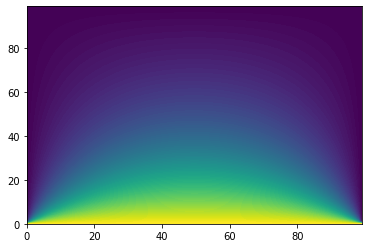

In [53]:
plt.contourf(V[1],100)

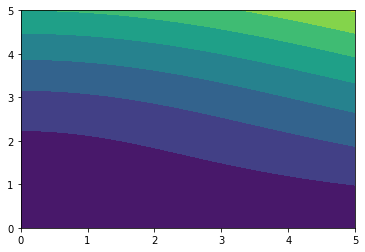

In [94]:
x = np.linspace(0,5,100)
y = np.linspace(0,5,100)

X, Y = np.meshgrid(x, y)

r = np.sqrt(X**2 + Y**2)
theta = np.arctan2(Y,X)

plt.contourf(X, Y, (r**2*np.sin(theta)))

In [89]:
np.arctan2

array([[0.  , 1.25, 2.5 , 3.75, 5.  ],
       [0.  , 1.25, 2.5 , 3.75, 5.  ],
       [0.  , 1.25, 2.5 , 3.75, 5.  ],
       [0.  , 1.25, 2.5 , 3.75, 5.  ],
       [0.  , 1.25, 2.5 , 3.75, 5.  ]])

In [90]:
Y

array([[0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.25, 1.25, 1.25, 1.25, 1.25],
       [2.5 , 2.5 , 2.5 , 2.5 , 2.5 ],
       [3.75, 3.75, 3.75, 3.75, 3.75],
       [5.  , 5.  , 5.  , 5.  , 5.  ]])